Có 5 thuộc tính trong dữ liệu:
- Time (thang đo khoảng): không có dấu hiệu Cheat do sự phân bố dữ liệu tương đối phù hợp với thực tế
- UserName (thang đo định danh): dấu hiệu Cheat là một cụm UserName (~1%) có tần số xuất hiện cao gây lệch phân bố
- VisitorID (thang đo định danh): dấu hiệu Cheat là một cụm VisitorID (~1%) có tần số xuất hiện cao gây lệch phân bố
- MediaID (thang đo định danh): dấu hiệu Cheat là một cụm MediaID (~1%) có tần số xuất hiện cao gây lệch phân bố
- ListenTime (thang đo tỷ lệ): dấu hiệu Cheat là một cụm ListenTime (~1%) có gía trị lớn gây lệch phân bố

Do vấn đề của bài toán là tìm cheat của những bài hát có lượt nghe cao (tần số xuất hiện) đột biến so với phân bố nên việc chọn cặp thuộc tính trong dữ liệu để thống kê mối liên hệ cần dựa trên thuộc tính MediaID:
- "MediaID - VisitorID" và "MediaID - UserName" thể hiện mối liên hệ giữa người dùng và bài hát (ví dụ: một VisitorID nghe một bài hát nhiều lần, hoặc nhiều UserName nghe cùng một bài hát,... tạo cho MediaID có tần số xuất hiện lớn)
- "MediaID - ListenTime" xem mối liên hệ giữa bài hát và thời gian nghe (ví dụ: MediaID có ListenTime cao thì có MediaID có tần số xuất hiện cao...)
- "MediaID - Time" xem mối liên hệ giữa bài hát và thời gian được nghe trong ngày (ví dụ: những MediaID có tần số xuất hiện cao thì được nghe vào thời gian nào trong ngày...)

In [1]:
# Read Data
import pandas as pd                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
f = open('/home/tampd/Downloads/cheatView1207.txt', 'r')
RowDatas = f.read().split('\n')
RawDatas = []
for RowData in RowDatas:
    RawDatas.append(RowData.split('\t'))
Datas = pd.DataFrame(RawDatas, columns = ['Time', 'UserName', 'VisitorID', 'ListenTime', 'TimeBetween'
                                          ,'MediaID', 'IP'])
Datas = Datas[:-1]
f.close()

In [2]:
# Reprocess Data
Datas['ListenTime'][Datas['ListenTime'] == ''] = '0'
Datas['TimeBetween'][Datas['TimeBetween'] == ''] = '0'
Datas[['ListenTime', 'TimeBetween']] = Datas[['ListenTime', 'TimeBetween']].astype(float)

In [3]:
# Exchange 'Time' Property
import numpy as np
temps = np.array(Datas['Time'][:])
for idx, temp in enumerate(temps):
    temps[idx] = float((((temp.split(' '))[1]).split(':'))[0]) 
Datas['Time'] = pd.Series(temps)

In [4]:
#print ((Datas[['VisitorID', 'MediaID']].groupby(['MediaID' ,'VisitorID'])).mode())
print (Datas.groupby('VisitorID').MediaID.value_counts()).sort_values()
print 'Mode:\t' + str((Datas.groupby('VisitorID').MediaID.value_counts()).idxmax()) + '\t' + str((Datas.groupby('VisitorID').MediaID.value_counts()).max())
print (Datas.groupby('VisitorID').MediaID.value_counts()).describe()
print '90%:\t' + str(Datas.groupby('VisitorID').MediaID.value_counts().quantile(0.9))
print '95%:\t' + str(Datas.groupby('VisitorID').MediaID.value_counts().quantile(0.95))
print '99%:\t' + str(Datas.groupby('VisitorID').MediaID.value_counts().quantile(0.99))

VisitorID                                         MediaID   
2000.00003bcdb12c5872013d.1479566576006.6a5ac7ba  5966132          1
2000.8e021771039eeac0b38f.1480388727670.219ea71e  1075772908       1
2000.8e02183574e89db6c4f9.1477004944977.f659d20d  1075785257       1
2000.8e026d4bd18438da6195.1471407347919.1c84c1e9  5996204          1
2000.8e0295ffe08209dc5093.1435997616790.0c77c458  1075228641       1
2000.8e02993f58d5b18be8c4.1481100130034.45b67173  1074213068       1
                                                  1075784817       1
2000.8e02debbfc5715094c46.1480252452291.8ee99707  5494652          1
2000.8e02df8103b2eaecb3a3.1463494716317.45479407  1074659317       1
                                                  1074691894       1
                                                  1074691896       1
2000.8e02127a9945701b2954.1465047055399.149011d8  1075788450       1
2000.8e0310a8ce42271c7e53.1481087756457.14d29234  1075191495       1
2000.8e0333bee25a0b04524b.1479110649194.61

In [5]:
print (Datas.groupby('VisitorID').MediaID.unique()).apply(lambda x: len(x)).sort_values()
print (Datas.groupby('VisitorID').MediaID.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas.groupby('VisitorID').MediaID.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas.groupby('VisitorID').MediaID.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas.groupby('VisitorID').MediaID.unique().apply(lambda x: len(x)).quantile(0.99))
print ((Datas.groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x))).sort_values()
print (Datas.groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas.groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas.groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas.groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.99))

VisitorID
2000.00003bcdb12c5872013d.1479566576006.6a5ac7ba      1
2000.906dbc789f51760f2f40.1458921232987.0af3bdd4      1
2000.906d9bcd61278879d136.1481073961964.dc43cc10      1
2000.906d58ac097ae024b96b.1475036452229.fa26770e      1
2000.906ca5f7c12b2875713a.1477402895707.1f97bc16      1
2000.906c224dc38c2ad2739d.1469258614142.d6c2d029      1
2000.906c04e2b20d5b53021c.1480433674762.076891e1      1
2000.906bddfc3220db7e8231.1477621460765.15ac1ebe      1
2000.906bad274ef4a7aafee5.1476425447673.80d17e6c      1
2000.906b845fa7aa4ef417bb.1481114792833.446f47e1      1
2000.906b723154c4bd9ae4d5.1481112728256.bc4ffc7e      1
2000.906b452776d29f8cc6c3.1481108041013.a21ec9fc      1
2000.906adff666808fded691.1433879794049.9996ec62      1
2000.906a9ec874229d7cc433.1481081898590.77475085      1
2000.906a68874672af2cf663.1481109601323.853f3d64      1
2000.906a4b407db594ebcda4.1481105943470.38e9cd2f      1
2000.9069fd854baba2f5fbba.1458702031921.6eb4e66d      1
2000.906974579f9176cf2f80.146889354398

In [6]:
Datas.groupby('MediaID').ListenTime.unique()

MediaID
0                                        [60000.0, 230000.0]
1000677                                 [235000.0, 230000.0]
1000679                                 [555000.0, 185000.0]
1001242                                            [40000.0]
1001407                                            [70000.0]
1001678                                            [45000.0]
1001701              [205000.0, 35000.0, 200000.0, 165000.0]
1001820                                            [35000.0]
100232                                            [200000.0]
100254                         [45000.0, 280000.0, 285000.0]
1002633                                           [165000.0]
1002680                                            [70000.0]
1002758                                            [95000.0]
1002893                                            [60000.0]
1003009                                            [75000.0]
1003062                                            [55000.0]
1003078         

In [7]:
print (Datas.groupby('MediaID').ListenTime.mean()).describe()
print '90%:\t' + str((Datas.groupby('MediaID').ListenTime.mean()).quantile(0.9)/1000)
print '95%:\t' + str((Datas.groupby('MediaID').ListenTime.mean()).quantile(0.95)/1000)
print '99%:\t' + str((Datas.groupby('MediaID').ListenTime.mean()).quantile(0.99)/1000)
print '------------------------FREQUENCY------------------------'
print (Datas.groupby('MediaID').ListenTime.size()).describe()
print '90%:\t' + str((Datas.groupby('MediaID').ListenTime.size()).quantile(0.9))
print '95%:\t' + str((Datas.groupby('MediaID').ListenTime.size()).quantile(0.95))
print '99%:\t' + str((Datas.groupby('MediaID').ListenTime.size()).quantile(0.99))
print '------------------------1% FREQUENCY (ListenTime)------------------------'
key_MediaID = (Datas.groupby('MediaID').ListenTime.size())[Datas.groupby('MediaID').ListenTime.size() >= Datas.groupby('MediaID').ListenTime.size().quantile(0.99)]
#(Datas[Datas['MediaID'].isin(temp.keys().values.tolist())]).describe()
print (Datas[Datas['MediaID'].isin(key_MediaID.keys().values.tolist())].groupby('MediaID').ListenTime.mean()).describe()
print '90%:\t' + str((Datas[Datas['MediaID'].isin(key_MediaID.keys().values.tolist())].groupby('MediaID').ListenTime.mean()).quantile(0.9)/1000)
print '95%:\t' + str((Datas[Datas['MediaID'].isin(key_MediaID.keys().values.tolist())].groupby('MediaID').ListenTime.mean()).quantile(0.95)/1000)
print '99%:\t' + str((Datas[Datas['MediaID'].isin(key_MediaID.keys().values.tolist())].groupby('MediaID').ListenTime.mean()).quantile(0.99)/1000)
#print Datas.groupby('MediaID').get_group(temp.keys()).describe()
#print 'Max:\t' + str((Datas.groupby('MediaID').ListenTime.size()).idxmax()) + '\t' +  str((Datas.groupby('MediaID').ListenTime.size()).max())                                                                              
#print (Datas.groupby('MediaID').get_group(str((Datas.groupby('MediaID').ListenTime.size()).idxmax())))['ListenTime'].describe()

count    1.065170e+05
mean     2.166304e+05
std      1.659393e+06
min      3.000000e+04
25%      7.000000e+04
50%      1.600000e+05
75%      2.299470e+05
max      3.524850e+08
Name: ListenTime, dtype: float64
90%:	287.926470588
95%:	345.0
99%:	1260.0
------------------------FREQUENCY------------------------
count    106517.000000
mean         68.816715
std        2261.387523
min           1.000000
25%           1.000000
50%           3.000000
75%          13.000000
max      499286.000000
dtype: float64
90%:	52.0
95%:	113.0
99%:	675.84
------------------------1% FREQUENCY (ListenTime)------------------------
count    1.066000e+03
mean     2.923509e+05
std      1.109007e+06
min      3.875706e+04
25%      1.895480e+05
50%      2.184779e+05
75%      2.571827e+05
max      3.272037e+07
Name: ListenTime, dtype: float64
90%:	308.234353421
95%:	361.616509563
99%:	874.574717184


In [8]:
# UserName-VisitorID
print (Datas[Datas['UserName'] != ''].groupby('VisitorID').UserName.unique()).apply(lambda x: len(x)).sort_values()
print (Datas[Datas['UserName'] != ''].groupby('VisitorID').UserName.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas[Datas['UserName'] != ''].groupby('VisitorID').UserName.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas[Datas['UserName'] != ''].groupby('VisitorID').UserName.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas[Datas['UserName'] != ''].groupby('VisitorID').UserName.unique().apply(lambda x: len(x)).quantile(0.99))

print (Datas[Datas['UserName'] != ''].groupby('UserName').VisitorID.unique()).apply(lambda x: len(x)).sort_values()
print (Datas[Datas['UserName'] != ''].groupby('UserName').VisitorID.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas[Datas['UserName'] != ''].groupby('UserName').VisitorID.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas[Datas['UserName'] != ''].groupby('UserName').VisitorID.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas[Datas['UserName'] != ''].groupby('UserName').VisitorID.unique().apply(lambda x: len(x)).quantile(0.99))

VisitorID
2000.000236a5c4b42dea74a5.1448771005940.9d58518b     1
2000.aa0e6940af34466a1f25.1433228413532.bf097d17     1
2000.aa0d779928c6c19898d7.1421765096366.5425faeb     1
2000.aa0a1f6364428d1cd453.1455889958264.ecd31cc3     1
2000.aa08f25362898bd7d298.1478696699123.0eb1cd4c     1
2000.aa06d18c64b28decd4a3.1465392759269.d0475c7f     1
2000.aa05657a5daeb4f0edbf.1474125753597.e0bccd88     1
2000.aa03446a0f81e6dfbf90.1480913512982.e84a5dc8     1
2000.aa032e58028cebd2b29d.1474160782460.4760c5a1     1
2000.aa015c99fd4814164d59.1475507172552.6eb7670b     1
2000.a9fa05067ddb9485cdca.1476972126358.ac699eb0     1
2000.a9f4f48fc64d2f13765c.1470023358054.3164b190     1
2000.aa12be10fc7915274c68.1431025222482.66546c9a     1
2000.a9f0843951e9b8b7e1f8.1476013338029.9d16a040     1
2000.a9ea5feba2244b7a1235.1471523464810.657ebff4     1
2000.a9e6faaa44f8ada6f4e9.1419753254609.923ab51f     1
2000.a9e6ce6a73799a27c368.1449542119845.5c4fd9cd     1
2000.a9e5e6c878fb91a5c8ea.1463401723723.f6a363a9     1


In [24]:
import numpy as np
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
# Cluster
datas = (Datas['MediaID'].value_counts().values).astype(float)
centroids, _ = kmeans(datas, 2)
idx, _ = vq(datas, centroids)
key_cluter0 = ((Datas['MediaID'].value_counts())[idx == 0]).keys().tolist()
key_cluter1 = ((Datas['MediaID'].value_counts())[idx == 1]).keys().tolist()
Datas[Datas['MediaID'].isin(key_cluter)]

#print float(idx.sum())/float(len(idx))
#plot(datas[idx==0], 'ob', datas[idx==1], 'or')
#show()

,Time,UserName,VisitorID,ListenTime,TimeBetween,MediaID,IP
0,19,,2000.00003bcdb12c5872013d.1479566576006.6a5ac7ba,35000.0,82209353.0,5966132,10.30.6.19
12,21,,2000.00018623e7f00eae57e1.1476197871794.9c1e80f6,110000.0,580947.0,5967847,10.30.6.19
13,20,,2000.00019df8830d6a53331c.1481115844150.08800f68,245000.0,247943.0,1074643883,10.30.6.19
14,20,,2000.00019df8830d6a53331c.1481115844150.08800f68,245000.0,449510.0,1074643883,10.30.22.188
15,21,,2000.00019df8830d6a53331c.1481115844150.08800f68,245000.0,247923.0,1074643883,10.30.6.19
16,21,,2000.00019df8830d6a53331c.1481115844150.08800f68,245000.0,248073.0,1074643883,10.30.22.188
17,21,,2000.00019df8830d6a53331c.1481115844150.08800f68,245000.0,247893.0,1074643883,10.30.22.188
18,20,,2000.00019df8830d6a53331c.1481115844150.08800f68,245000.0,247799.0,1074643883,10.30.22.188
19,21,,2000.00019df8830d6a53331c.1481115844150.08800f68,245000.0,838803.0,1074643883,10.30.22.188
20,21,,2000.00019df8830d6a53331c.1481115844150.08800f68,245000.0,248601.0,1074643883,10.30.6.19


In [25]:
#print ((Datas[['VisitorID', 'MediaID']].groupby(['MediaID' ,'VisitorID'])).mode())
print (Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts()).sort_values()
print 'Mode:\t' + str((Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts()).idxmax()) + '\t' + str((Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts()).max())
print (Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts()).describe()
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts().quantile(0.9))
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts().quantile(0.95))
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts().quantile(0.99))

VisitorID                                         MediaID   
2000.00003bcdb12c5872013d.1479566576006.6a5ac7ba  5966132          1
2000.6517ac9db24e5b10025f.1476105785571.af4f470f  1073743530       1
2000.be680cb8a97e4020196f.1468806126322.5acccf06  5996204          1
2000.be68577d6fae86f0dfbf.1476068006457.c96f2c62  1074737141       1
2000.6517a7d53e39d7678e28.1480321932661.72ef0e5c  1073818740       1
2000.65176a8b5f52b60cef43.1478050567503.955a013a  5635912          1
2000.be6895e20102e85cb113.1479718751229.e260af07  1074219808       1
2000.6516eb48be8657d80e97.1471854551870.d5ae45f4  1075509143       1
                                                  1075474786       1
2000.6516b0a4589ab1c4e88b.1465529133893.974bee6c  1074595790       1
2000.be6895e20102e85cb113.1479718751229.e260af07  1074243985       1
2000.65165ab53357da098346.1479999433951.a1c45426  1075438936       1
2000.be68c2071adaf384aacb.1477225455446.d342e002  1074070427       1
2000.6515e5ee64038d5dd412.1480206530276.80

In [26]:
#print ((Datas[['VisitorID', 'MediaID']].groupby(['MediaID' ,'VisitorID'])).mode())
print (Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts()).sort_values()
print 'Mode:\t' + str((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts()).idxmax()) + '\t' + str((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts()).max())
print (Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts()).describe()
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts().quantile(0.9))
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts().quantile(0.95))
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts().quantile(0.99))

VisitorID                                         MediaID   
2000.809a77d2e6e30fbd56f2.1462534358167.b5d295a7  1075771983       1
2000.8a0b361cb934506a0925.1459671168777.55efbe2b  1075286222       1
                                                  1075223258       1
                                                  1075170082       1
                                                  1074816191       1
                                                  1074793765       1
                                                  1074679839       1
                                                  1074585023       1
2000.8a0a29dfe4e50dbb54f4.1467161932083.0cf50dac  1075782997       1
2000.8a0a1944f052190c4043.1448288264268.f943ce3d  1075399424       1
2000.8a09bc3d75f79ca9c5e6.1473695251493.550f0f0e  1075496590       1
2000.8a08e01d3929d0778938.1461679965971.65d1d06c  1075792292       1
2000.8a08bef271e898b6c1f9.1453629793974.90a27d97  1075772551       1
2000.8a07d49482bd6be332ac.1459054278481.1a

In [28]:
print ((Datas[Datas['MediaID'].isin(key_cluter0)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x))).sort_values()
print (Datas[Datas['MediaID'].isin(key_cluter0)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter0)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter0)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter0)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.99))

MediaID
1168730         1
3151521         1
3151462         1
3151417         1
3151209         1
3151107         1
3150943         1
3150865         1
3151540         1
3150597         1
3150478         1
3150454         1
3149523         1
3149422         1
3148916         1
3148835         1
3148821         1
3150574         1
3148785         1
3151545         1
3151976         1
3155717         1
315570          1
3155310         1
3155288         1
315523          1
3155225         1
3155216         1
3151579         1
315502          1
             ... 
1075748598    347
1074053968    351
1075058577    353
1075531125    354
1074931231    358
1073778244    359
1075435155    362
1074385775    363
1075245453    367
6086248       368
1075295845    375
1074986930    379
1075156298    382
1074398754    383
1075260379    384
1074448600    390
1074131753    392
1073836217    414
1073839150    415
1074693721    429
1073769179    433
1073839719    435
1074464275    440
1074867951    440
10

In [27]:
print ((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x))).sort_values()
print (Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.99))

MediaID
1075778801       83
1075541003      111
1075788933      164
6294897         170
1075795976      176
1073797616      180
1075788633      188
1075776617      192
6276214         193
1075202123      193
1075787979      195
6281407         208
6295473         210
1074522482      211
1075779639      214
6293605         218
6273413         225
1074032396      226
1075778221      230
6253356         243
6285777         252
1075776864      258
1075750534      262
1075793752      267
1074091504      269
6244920         269
1075776861      269
6253745         272
1073783483      272
1074788844      272
              ...  
1075755756     3450
1075765293     3472
1075548426     3608
1075752472     3781
1075507785     3838
1074344478     3885
1075749795     4015
1075455731     4153
1075552481     4702
1074425097     6010
1075465009     6073
1075550468     6146
1075784817     6643
6282518        6682
1075792292     7733
1075771983     8306
1075758867     8389
1075751008    10120
1075785257  

In [29]:
#MediaID - ListenTime
print (Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').ListenTime.mean()).describe()
print '90%:\t' + str((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').ListenTime.mean()).quantile(0.9)/1000)
print '95%:\t' + str((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').ListenTime.mean()).quantile(0.95)/1000)
print '99%:\t' + str((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').ListenTime.mean()).quantile(0.99)/1000)

count    4.330000e+02
mean     2.439071e+05
std      1.186092e+05
min      8.265044e+04
25%      1.941783e+05
50%      2.221363e+05
75%      2.619473e+05
max      1.864914e+06
Name: ListenTime, dtype: float64
90%:	311.388453952
95%:	374.226029788
99%:	698.977188619


In [30]:
print (Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.unique()).apply(lambda x: len(x)).sort_values()
print (Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.unique().apply(lambda x: len(x)).quantile(0.99))

VisitorID
2000.00005ddb200ec950901f.1473835704591.8b80af76     1
2000.84c67804fe1d17434e0c.1452101974839.b468fbad     1
2000.84c7557c0956e008b947.1460472818327.fe8b3073     1
2000.84c756a82986c0d89997.1458570270298.1ebadcca     1
2000.84c78342c8a921f778b8.1480913764519.5fa06a31     1
2000.84c7b6c38f3666683f27.1481103586404.1acb74ba     1
2000.e6bf35c619a6f0f8a9b7.1427972023362.f8a9ac72     1
2000.e6bf129e4e74a72afe65.1481021843329.cf8075b0     1
2000.84c8f168ba4753190a56.1458276516919.3a15a469     1
2000.e6bed9bb6150880ed141.1480919237681.be1687e0     1
2000.84c918693dbad4e48dab.1476096475232.9454380d     1
2000.84c952b2b97a5024096b.1472899108268.d37586d8     1
2000.84c9782e43dbaa85f3ca.1481104765605.0bf5646a     1
2000.84c97bd8a2a24bfc12b3.1439118435164.554c0a0d     1
2000.84c97dddf9c4109a49d5.1452096218631.9031e303     1
2000.84c5dcc14b2ba275fb3a.1481059376949.538719b1     1
2000.84c98c8e65608c3ed571.1480593206744.ae579f3e     1
2000.84ca5e31a9f940a719e8.1472885126541.f0bfe168     1


In [31]:
# 'VisitorID' Property

print '------------------------------------------------------------------------'
print Datas[Datas['MediaID'].isin(key_cluter1)]['VisitorID'].describe()

# Frequency
print '------------------------FREQUENCY------------------------'
temp = Datas[Datas['MediaID'].isin(key_cluter1)]['VisitorID'].value_counts()
print temp
print temp.describe()
print '90%: ' + str(temp.quantile(0.9))
print '95%: ' + str(temp.quantile(0.95))
print '99%: ' + str(temp.quantile(0.99))

------------------------------------------------------------------------
count                                              4527165
unique                                              394056
top       2000.28cc2c1dd2fd3ba362ec.1479732852895.416a8e72
freq                                                  2109
Name: VisitorID, dtype: object
------------------------FREQUENCY------------------------
2000.28cc2c1dd2fd3ba362ec.1479732852895.416a8e72    2109
2000.4632fb4e652d8c73d53c.1428632301775.cb174923    1880
2000.88d902f6fc15154b4c04.1479900113410.c766d81b    1658
2000.c6d65f50b35e5a00034f.1444575680418.d0cc40bb    1410
2000.1eadcae21efbf7a5aeea.1452183291417.5561c780    1359
2000.8e0f8a3049e0a0bef9f1.1476058996337.15e07269    1308
2000.864c03428b9762c93b86.1474014574509.110d2aa7    1264
2000.950e41b3995a7004294b.1480723046568.08827304    1153
2000.c08a92e0acc1459f1cd0.1455772006048.5b3c12a0    1113
2000.720b93443861d13f8870.1453954924167.8d952de7     986
2000.c72e549eb37d5a23036c.147991

In [33]:
# 'ListenTime' Property

# Before Denoise
print '------------------------------------------------------------------------'
# Mode
print 'Mode:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].mode()/1000)
# Mean, 25%, 50%, 75%
print Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].describe()
# 90%
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].quantile(0.9)/1000)
# 95%
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].quantile(0.95)/1000)
# 99%
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].quantile(0.99)/1000)

# Variance
print 'Variance:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].var()/1000)
# Skewness
print 'Skewness:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].skew())
# Kurtosis
print 'Kurtosis:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].kurt())

------------------------------------------------------------------------
Mode:	0    270.0
dtype: float64
count    4.527165e+06
mean     2.531911e+05
std      1.408089e+06
min      3.000000e+04
25%      1.600000e+05
50%      2.250000e+05
75%      2.700000e+05
max      1.093945e+09
Name: ListenTime, dtype: float64
90%:	315.0
95%:	330.0
99%:	465.0
Variance:	1982714371.34
Skewness:	208.491982582
Kurtosis:	111227.766381


In [34]:
print '------------------------------------------------------------------------'
print Datas['Time'].describe()
# Mean
print 'Mean:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].mean())
# Variance
print 'Variance:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].var())
# Standard Deviation
print 'Standard Deviation:\t' + str(Datas['Time'].std())
# 25%
print '25%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].quantile(0.25))
# 50%
print '50%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].quantile(0.5))
# 75%
print '75%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].quantile(0.75))
# 90%
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].quantile(0.9))
# 95%
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].quantile(0.95))
# 99%
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].quantile(0.99))

# Frequency
print '------------------------FREQUENCY------------------------'
temp = Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].value_counts()
print temp
print temp.describe()
print '90%: ' + str(temp.quantile(0.9))
print '95%: ' + str(temp.quantile(0.95))
print '99%: ' + str(temp.quantile(0.99))

------------------------------------------------------------------------
count     7330150.0
unique         24.0
top            15.0
freq       547241.0
Name: Time, dtype: float64
Mean:	14.3409475908
Variance:	27.0131995503
Standard Deviation:	5.22995009144
25%:	11.0
50%:	15.0
75%:	18.0
90%:	21.0
95%:	22.0
99%:	23.0
------------------------FREQUENCY------------------------
15.0    341475
16.0    331371
14.0    318362
13.0    299703
17.0    288435
10.0    287859
11.0    287126
20.0    277054
12.0    273297
18.0    264615
19.0    250900
9.0     239760
21.0    236693
22.0    198627
8.0     152204
23.0    131307
0.0      82019
7.0      72377
1.0      52023
2.0      35374
6.0      33124
3.0      26509
5.0      24018
4.0      22933
Name: Time, dtype: int64
count        24.000000
mean     188631.875000
std      115859.020679
min       22933.000000
25%       67288.500000
50%      238226.500000
75%      287309.250000
max      341475.000000
Name: Time, dtype: float64
90%: 312764.3
95%: 329419.65

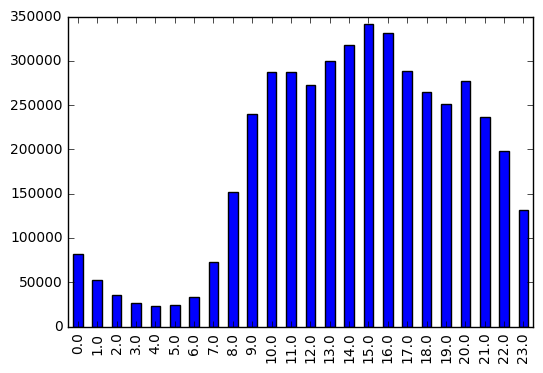

In [37]:
import matplotlib.pyplot as plt
((Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].value_counts()).sort_index()).plot.bar()
plt.show()